# Exercise 3.16

In [104]:
import numpy as np
from numpy.linalg import matrix_power
from scipy.linalg import orth

def find_fist_singular_vector(a):
    B = np.transpose(a)@a
    x = np.random.rand(B.shape[0],1)
    threshold = 0.002
    difference = 1
    k=1
    new_x=x
    while difference > threshold:
        new_x = (matrix_power(B,k)@x)
        scalar = np.amin(new_x)
        scalar = 1/scalar
        new_x = scalar*new_x
        difference = np.linalg.norm(new_x-x, ord=2)
        x = new_x
        k = k+1
        if(k == 50):
            print("Had to break")
            break
    
    return new_x/np.linalg.norm(new_x)

def find_singular_vectors(k,a):
    B = np.transpose(a)@a
    x = np.random.rand(B.shape[0],k)
    x = orth(x)
    new_x = x
    i = 1
    difference = 1
    threshold = 0.002
    while difference > threshold:
        new_x = (matrix_power(B,i)@x)
        new_x = orth(new_x)
        difference = np.linalg.norm(new_x-x,ord=2)
        x = new_x
        i = i+1
        if(i == 100):
            print("Had to break")
            break
    return new_x


In [99]:
A = np.matrix([[1,2,3,4,5,6,7,8,9,10],
               [2,3,4,5,6,7,8,9,10,0],
               [3,4,5,6,7,8,9,10,0,0],
               [4,5,6,7,8,9,10,0,0,0],
               [5,6,7,8,9,10,0,0,0,0],
               [6,7,8,9,10,0,0,0,0,0],
               [7,8,9,10,0,0,0,0,0,0],
               [8,9,10,0,0,0,0,0,0,0],
               [9,10,0,0,0,0,0,0,0,0],
               [10,0,0,0,0,0,0,0,0,0]])

# 1).

In [100]:
print(find_fist_singular_vector(A))

[[0.31975061]
 [0.36962503]
 [0.39811309]
 [0.4039189 ]
 [0.38728043]
 [0.34995869]
 [0.29512625]
 [0.22716237]
 [0.15136863]
 [0.07362362]]


# 2).

In [105]:
print(find_singular_vectors(4,A))

[[-0.3197506   0.45784552 -0.42415456  0.39364456]
 [-0.36962502  0.3936509  -0.24288284  0.02848698]
 [-0.39811309  0.25497036  0.07043602 -0.36153369]
 [-0.4039189   0.06980555  0.33936334 -0.38322689]
 [-0.38728043 -0.12450888  0.41233765 -0.01439342]
 [-0.3499587  -0.2887672   0.24775341  0.37382728]
 [-0.29512626 -0.38972804 -0.06268814  0.39082214]
 [-0.22716239 -0.40675711 -0.34546459  0.01996826]
 [-0.15136864 -0.33594883 -0.44265159 -0.36463231]
 [-0.07362363 -0.19090282 -0.30058613 -0.37498211]]


# Exercise 3.27

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def SVD_img_reconstruction(A,k):
    B = np.zeros_like(A)
    
    #We need to decompose and reconstruct for each red, green, blue channel, and alpha channel
    U_r, sigma_r, V_r = np.linalg.svd(A[:,:,0])
    U_g, sigma_g, V_g = np.linalg.svd(A[:,:,1])
    U_b, sigma_b, V_b = np.linalg.svd(A[:,:,2])
    U_a, sigma_a, V_a = np.linalg.svd(A[:,:,3])
    
    B[:,:,0] = np.matrix(U_r[:, :k]) * np.diag(sigma_r[:k]) * np.matrix(V_r[:k, :])
    B[:,:,1] = np.matrix(U_g[:, :k]) * np.diag(sigma_g[:k]) * np.matrix(V_g[:k, :])
    B[:,:,2] = np.matrix(U_b[:, :k]) * np.diag(sigma_b[:k]) * np.matrix(V_b[:k, :])
    B[:,:,3] = np.matrix(U_a[:, :k]) * np.diag(sigma_a[:k]) * np.matrix(V_a[:k, :])
    #Make sure we're not over 255 for rgba
    B = np.clip(B,0,255)
    
    
    print("Precent of Frobenius norm captured: " + str(np.sum(sigma_r[:k])/np.sum(sigma_r)))
    
    return B
    

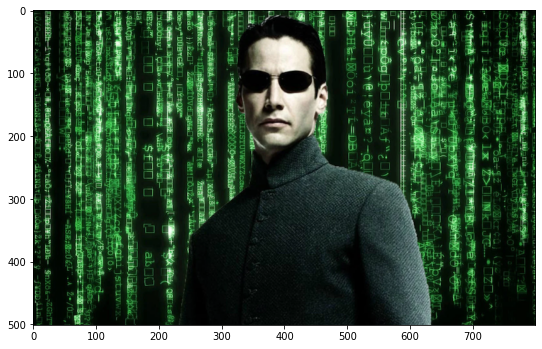

In [12]:
img = Image.open('the_matrix.png')
img.load()
#Conver to numpy array
A = np.asarray( img, dtype="int32" )
plt.figure(figsize=(9, 6))
plt.imshow(A)

### 1 singular value

Precent of Frobenius norm captured: 0.10614899868918061


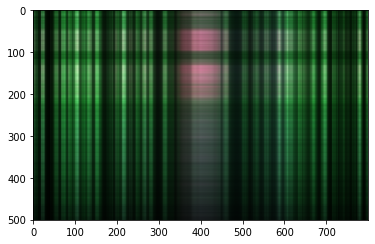

In [21]:
plt.imshow(SVD_img_reconstruction(A,1));

### 2 singular values

Precent of Frobenius norm captured: 0.15160225177923772


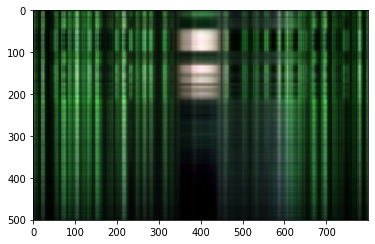

In [22]:
plt.imshow(SVD_img_reconstruction(A,2));

### 4 singular values

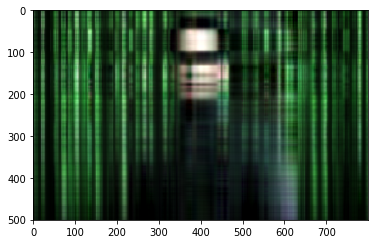

In [74]:
plt.imshow(SVD_img_reconstruction(A,4));

### 16 singular values

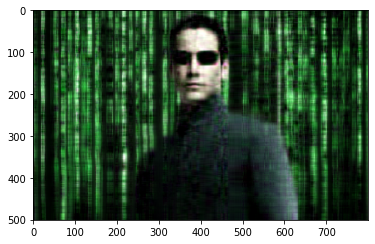

In [75]:
plt.imshow(SVD_img_reconstruction(A,16));

In [17]:
G = np.array([[1,2,3],[4,5,6]])

x, y, z = np.linalg.svd(G)

print(x)
print(y)
print(z)

[[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]]
[9.508032   0.77286964]
[[-0.42866713 -0.56630692 -0.7039467 ]
 [ 0.80596391  0.11238241 -0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]
